# Black Friday

 <img src="images/blackfridaycanceled.jpg" />

### What is Black Friday?
Black Friday is the day after Thanksgiving. Retailers typically offer steep discounts on Black Friday to kick off the holiday season.Black friday is the one of the most profitable days for all the retailers and for the buyers too. It’s common for retailers to offer special promotions and open their doors during the pre-dawn hours on Black Friday to attract customers.

To keep up with the competition, retailers need some insights and cluster of customers to segmantize and to target them. So, retailers can use different marketing strategies to attract different types of customers.

Data scientist can help retailers with proper insights based on the historical data of black friday and also give proper data driven solutions by using Data science methods and by following the **CRISP-DM Process (Cross Industry Process for Data Mining)**. Thus, they can achieve thier target/goal.This project is all about this.

In this Notebook, we are going to follow stages,

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

## 1. Business Understanding
As mentioned above, All the retailers' goal is to attract more and more customers for black friday deals. This is like a competition for them to get the customers to thiers online platforms or physical retail stores. So let's start exploring the dataset.

First We will import libraries and load the data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, 

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# data preprocessing
import sklearn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor

import xgboost as xgb
from xgboost.sklearn import XGBRegressor

# utils
import os
import warnings
import pickle
from math import sqrt


# To ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# standard scaler object
stdscaler = StandardScaler()

# check the data files
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



./kaggle/input/.DS_Store
./kaggle/input/black-friday/test.csv
./kaggle/input/black-friday/train.csv


In [3]:
# create Training Dataframe
train_df = pd.read_csv("./kaggle/input/black-friday/train.csv")

## 2. Data Understanding

Now we have the dataframe, so we can start doing **EDA (Exploratory Data Analysis)** , **DA (Descriptive Analysis)**.

Let's have a look at first 5 rows

In [4]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Descriptive Analysis of all the fields' which includes count of non Null values, data types , mean, median, min, max , etc.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
train_df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


#### Data Shape and unique values of  users, products 

In [7]:
print("All columns -> {}".format(list(train_df.columns)))
print()
print("==============================================")
print("Total Transactions -> {}".format(train_df.shape[0]))

unique_users = len(train_df.User_ID.unique())
print("Total unique users -> {}".format(unique_users))

unique_products = len(train_df.Product_ID.unique())
print("Total unique products -> {}".format(unique_products))

All columns -> ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']

Total Transactions -> 550068
Total unique users -> 5891
Total unique products -> 3631


## =====================================================================

#### Total Transactions by Age, Gender, Occupation, City and Years Stay In current City  

##### Questions :- 
1. Which age group have done more transactions?
2. Have males done more transactions  than females ?
3. Do users' occupation have any relation to number of transactions?
4. Do users who are living in the city more than 1 year have done more transactions?
5. Does category of city have any impact on purchase quantity? 
6. Does marital status is related to Black Friday purchase?

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

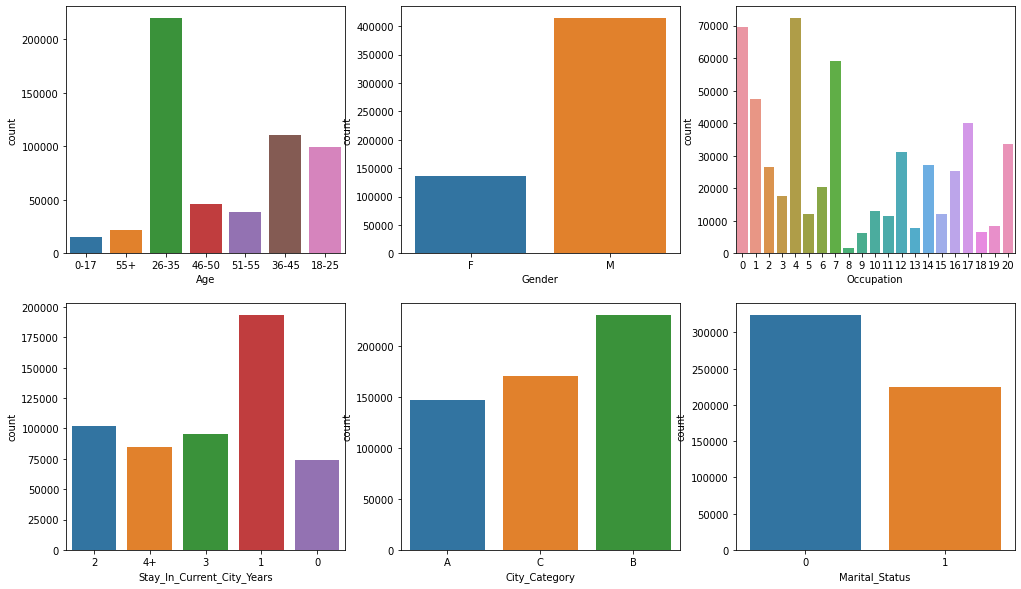

In [8]:
# Creating Count plots for Important categorical fields 
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(17,10))

sns.countplot(train_df["Age"],ax=axis[0,0])
sns.countplot(train_df["Gender"],ax=axis[0,1])
sns.countplot(train_df["Occupation"],ax=axis[0,2])
sns.countplot(train_df["City_Category"],ax=axis[1,1])
sns.countplot(train_df["Stay_In_Current_City_Years"],ax=axis[1,0])
sns.countplot(train_df["Marital_Status"],ax=axis[1,2])

#### From Above Figures we can conclude that,

##### Conclusions :- 
* In figure 1, 26-35 age range have done more transactions.
* In figure 2, Male users have done more transactions.
* In figure 3, Users whose occupations are 0 and 4 have done more transactions.
* In figure 4, Users who stayed in current city for 1 year have done more transactions.
* In figure 5, Users from city category B have done more transactions.
* In figure 6, Users who are not married yet have done more transactions.

## =====================================================================

#### Total Purchasing Amount Paid group by Age, Gender, Occupation, City , Years Stay In current City  and marital status 

##### Questions :- 
1. Which age group have spent more in black friday?
2. Have females spent more than males ?
3. Do users' occupation have any relation on spending money at black friday?
4. Do users who are living in the city more than 1 year have spent more money?
5. Does category of city have any imapact on total purchase amount? 
6. Does marital status is related to the black friday?

<AxesSubplot:xlabel='Marital_Status'>

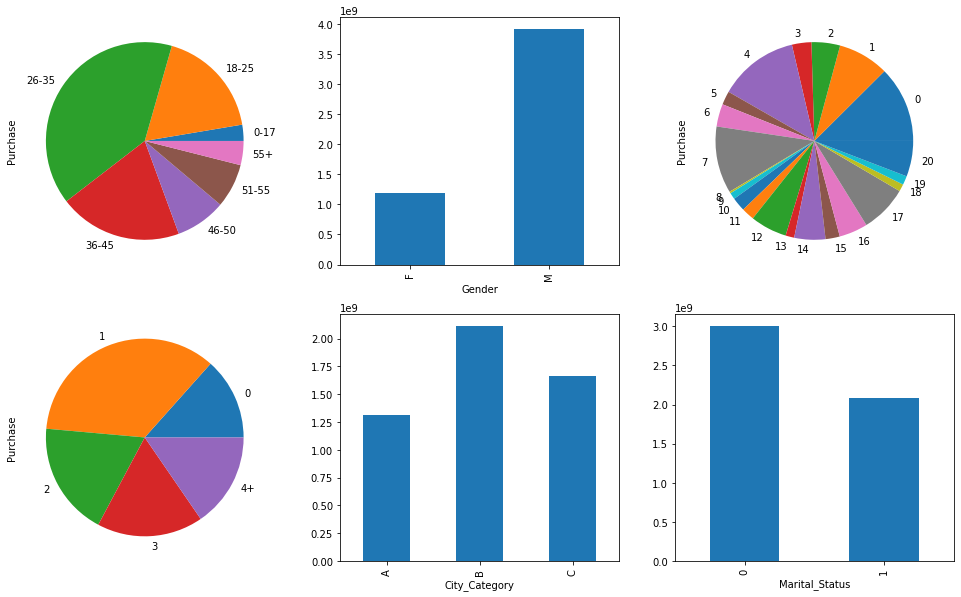

In [9]:
# Creating Count plots for Important categorical fields 

fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(17,10))

train_df.groupby(["Age"])["Purchase"].sum().plot(kind='pie',ax=axis[0,0])
train_df.groupby(["Gender"])["Purchase"].sum().plot(kind='bar',ax=axis[0,1])
train_df.groupby(["Occupation"])["Purchase"].sum().plot(kind='pie',ax=axis[0,2])
train_df.groupby(["City_Category"])["Purchase"].sum().plot(kind='bar',ax=axis[1,1])
train_df.groupby(["Stay_In_Current_City_Years"])["Purchase"].sum().plot(kind='pie',ax=axis[1,0])
train_df.groupby(["Marital_Status"])["Purchase"].sum().plot(kind='bar',ax=axis[1,2])

#### From Above Figures we can conclude that,

##### Conclusions :- 
* In figure 1, 26-35 age range have spent more money.
* In figure 2, Male users have spent more money.
* In figure 3, Users whose occupations are 0 and 4 have spent more money.
* In figure 4, Users who stayed in current city for 1 year have spent more money.
* In figure 5, Users from city category B have spent more money.
* In figure 6, Users who are not married yet have spent more money.

#### Btw the insights look same for both purchase total Count and Amount. So let's chceck out the average Amount

## =====================================================================

#### Let's see Average Purchased Amount by Age, Gender, Occupation, City , Years Stay In current City  and marital status

##### Questions :- 
1. Does average values have different story to tell than with the total values?

<AxesSubplot:xlabel='Marital_Status'>

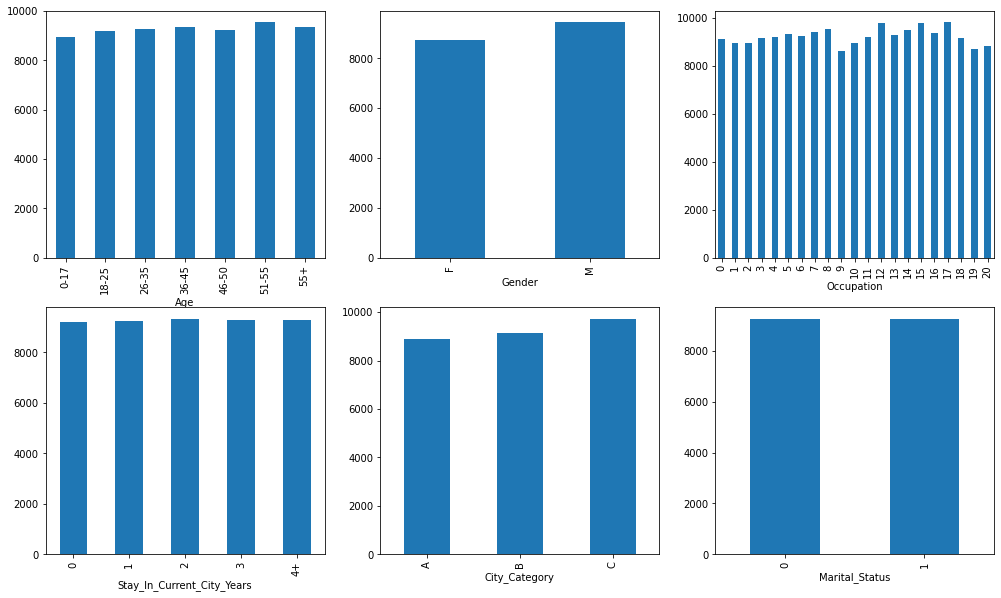

In [10]:
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(17,10))

train_df.groupby(["Age"])["Purchase"].mean().plot(kind='bar',ax=axis[0,0])
train_df.groupby(["Gender"])["Purchase"].mean().plot(kind='bar',ax=axis[0,1])
train_df.groupby(["Occupation"])["Purchase"].mean().plot(kind='bar',ax=axis[0,2])
train_df.groupby(["City_Category"])["Purchase"].mean().plot(kind='bar',ax=axis[1,1])
train_df.groupby(["Stay_In_Current_City_Years"])["Purchase"].mean().plot(kind='bar',ax=axis[1,0])
train_df.groupby(["Marital_Status"])["Purchase"].mean().plot(kind='bar',ax=axis[1,2])

After seeing above figures, we can conclude that, according to the data , for all the categories of the categorical fields, the average purchased amounts are almost same.

## =====================================================================

####  Let's see the total Purchased Amount by gender by Age, Occupation, Years Stay In current City  and marital status

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

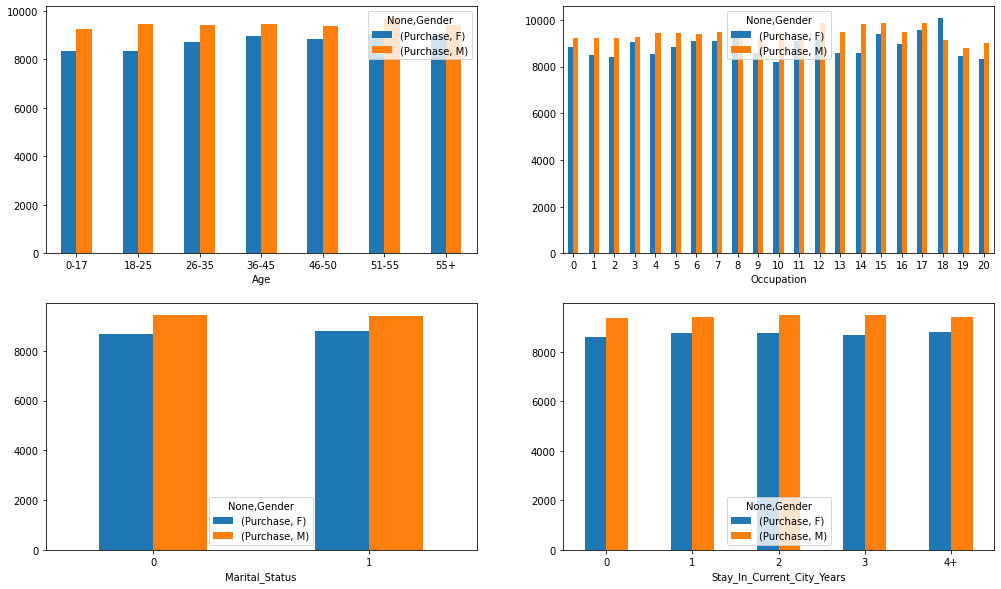

In [11]:
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(17,10))

train_df.groupby(["Age","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[0,0])
train_df.groupby(["Occupation","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[0,1])
train_df.groupby(["Marital_Status","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[1,0])
train_df.groupby(["Stay_In_Current_City_Years","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[1,1])

## =====================================================================

#### Let's see Pairplot with all Numeric columns

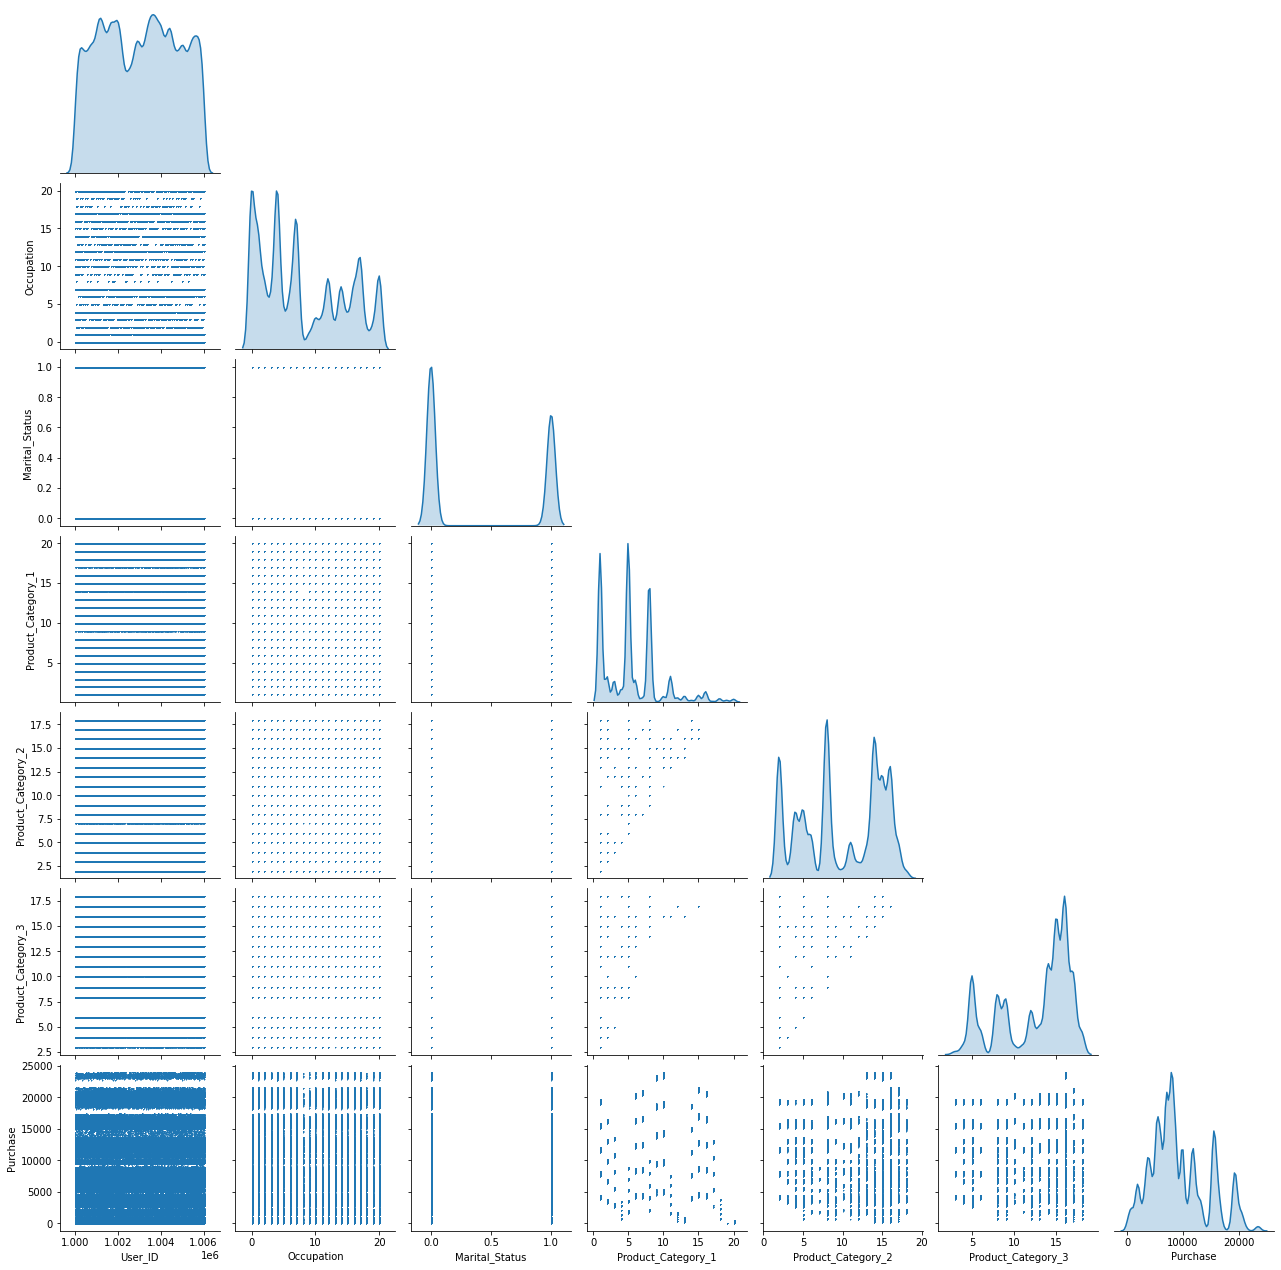

In [45]:
sns.pairplot(train_df,diag_kind="kde",corner=True,
             markers="+",
             plot_kws=dict(s=1, edgecolor="b", linewidth=1),
             diag_kws=dict(shade=True) )

* Above Pairplot is not giving more good insights about the correlation between numeric values.
* Also marital status and occupation fields are also being considered as those are in Numeric form.We need to change those fields to categorical type.

## 3. Prepare Data
#### Handle Missing Values 

In [24]:
(train_df.isna().sum()*100/train_df.shape[0]).sort_values(ascending=False).to_frame().rename(columns={0:"Percentage of missing values"})

,Percentage of missing values
Product_Category_3,69.672659
Product_Category_2,31.566643
Purchase,0.000000
Product_Category_1,0.000000
Marital_Status,0.000000
Stay_In_Current_City_Years,0.000000
City_Category,0.000000
Occupation,0.000000
Age,0.000000
Gender,0.000000


### Product Categories

The product categories are categories of that particular product, if product belongs to more than one category , then there will be some values available for other product categories. So here we are dealing with very strange categorical feature.

let me show you one example of particular product_ID = "**P00265242**" ,

In [13]:
train_df.loc[train_df.Product_ID=="P00265242",["User_ID","Product_ID","Product_Category_1" ,"Product_Category_2","Product_Category_3"]]

,User_ID,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
399,1000066,P00265242,5,8.0,NaN
1191,1000196,P00265242,5,8.0,NaN
1372,1000222,P00265242,5,8.0,NaN
1845,1000301,P00265242,5,8.0,NaN
2209,1000345,P00265242,5,8.0,NaN
...,...,...,...,...,...
543413,1005667,P00265242,5,8.0,NaN
544366,1005797,P00265242,5,8.0,NaN
544629,1005837,P00265242,5,8.0,NaN
544834,1005872,P00265242,5,8.0,NaN


So, For particular product ID you will have a same values for all the product categories

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

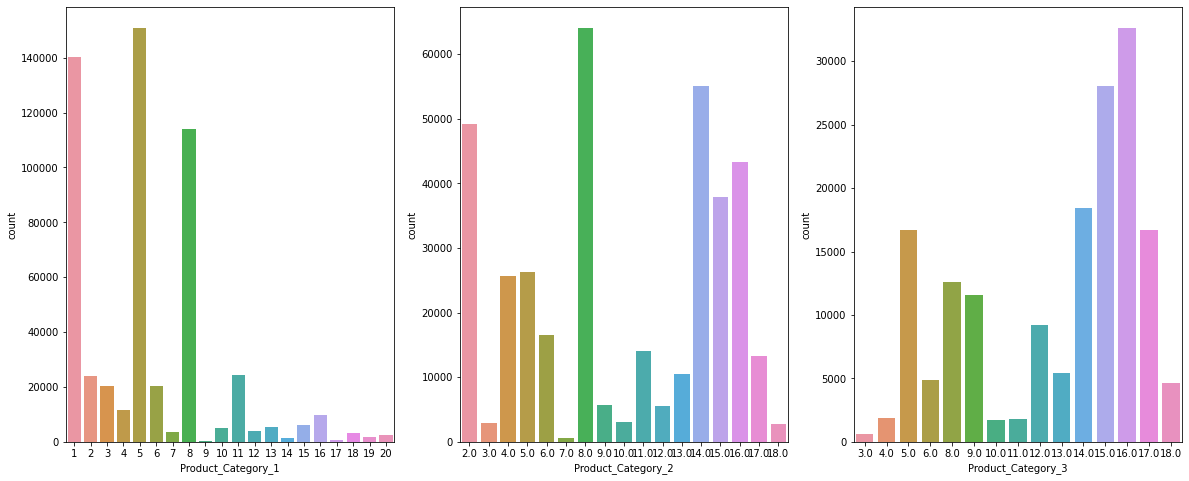

In [38]:
fig,axis = plt.subplots(nrows=1,ncols=3,figsize=(20,8))

sns.countplot(train_df["Product_Category_1"],ax=axis[0])
sns.countplot(train_df["Product_Category_2"],ax=axis[1])
sns.countplot(train_df["Product_Category_3"],ax=axis[2])

this is what I understood from the data , so to fill the missing values we just need to fill those as zero.

In [40]:
train_df[["Product_Category_2","Product_Category_3"]] = train_df[["Product_Category_2","Product_Category_3"]].fillna(0)

#### Let's check again 

In [42]:
(train_df.isna().sum()*100/train_df.shape[0]).sort_values(ascending=False).to_frame().rename(columns={0:"Percentage of missing values"})

,Percentage of missing values
Purchase,0.0
Product_Category_3,0.0
Product_Category_2,0.0
Product_Category_1,0.0
Marital_Status,0.0
Stay_In_Current_City_Years,0.0
City_Category,0.0
Occupation,0.0
Age,0.0
Gender,0.0


### Data Transformation

#### Now we don't have any Missing values, So we can transform our data and feed into the Machine learning model for training.
* For Transformation :- 
    1. **Categorical Fields** :- We will use the label encoder to labelize all the categories.
    2. **Numeric Fields** :- We can standardize the values based on standard scaler , and transform the data into  mean = 0, std = 1, Btw it seems actually there is no need , as all the fields are somewhat categorical fields only.
* Get two dataframes containing only Independent fields and only dependent field into new variables

In [43]:
# Label encoder object
le = LabelEncoder()

train_df["Age"] = le.fit_transform(train_df["Age"])
train_df["Stay_In_Current_City_Years"] = le.fit_transform(train_df["Stay_In_Current_City_Years"])
train_df["City_Category"] = le.fit_transform(train_df["City_Category"])

# dropped unnecessary fields
train_dropped_df = train_df.drop(['User_ID', 'Product_ID'],axis=1)
print("Dropped the user and product id field")

X = pd.get_dummies(train_dropped_df.drop(columns='Purchase'), prefix=["Gender"])

# separate dataframes one is for independant fields and another for dependant field (Target Field)
y = train_dropped_df['Purchase'].values

Dropped the user and product id field


#### What is the correlation between all the fields ?

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

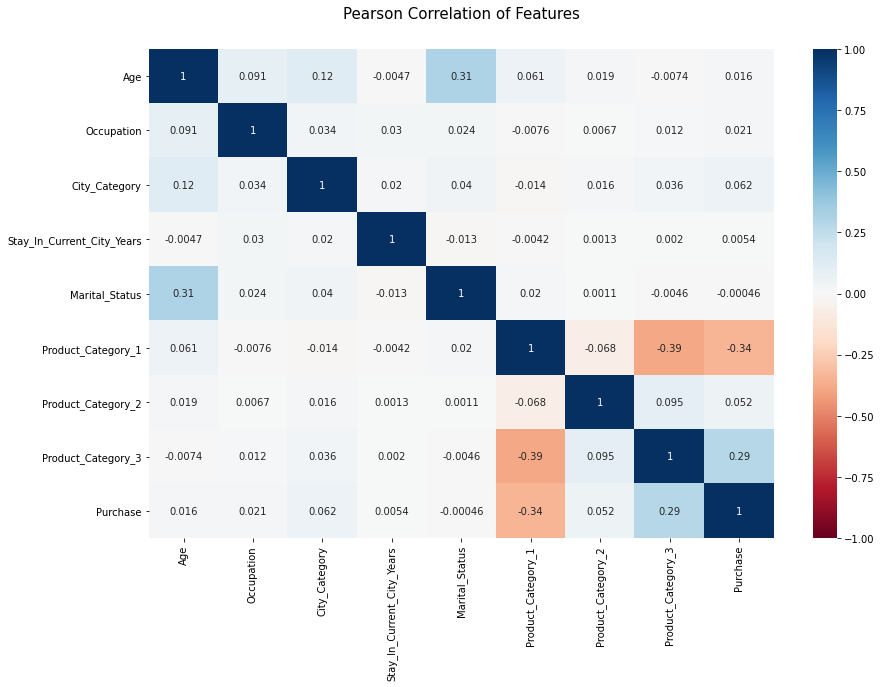

In [70]:
colormap = plt.cm.RdBu
pd.get_dummies(train_dropped_df, prefix=["Gender"])
plt.figure(figsize=(14,9))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_dropped_df.corr(),
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            annot=True)

In [17]:
print("Input shape -> {}".format(X.shape))
print("Output shape -> {}".format(y.shape))

Input shape -> (550068, 11)
Output shape -> (550068,)


## 4. Data Modeling  and 5. Evaluate the Results
#### Split the Data into train and test data set by 70%-30% 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Input train shape -> {}".format(X_train.shape))
print("Input test shape -> {}".format(X_test.shape))

Input train shape -> (385047, 11)
Input test shape -> (165021, 11)


####  Train Different Models and evaluate the results

In [20]:
def train_and_evaluate(model,X_train,y_train,X_test,y_test):
    '''
    This function is to fit the machine learning model and evaluate the R2 score for train and test data
    
    INPUT:
    model - Machine Learning model
    X_train - Training data 
    y_train - Training output values
    X_test - Testing data
    y_test - Testing output values
    
    OUTPUT:
    model - Trained Machine Learning  model
    '''
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Score method gives the R2 score actually, so we can directly check the R2 score
    print("Train R-2 Score -> {}".format(r2_score(y_train, y_pred_train)))
    print("Test R-2 Score -> {}".format(r2_score(y_test,y_pred_test)))
    print()
    print("=============================================")
    print()
    print("Train RMSE Score -> {}".format(sqrt(mean_squared_error(y_train, y_pred_train))))
    print("Test RMSE Score -> {}".format(sqrt(mean_squared_error(y_test,y_pred_test))))
    return model

#### 1. Linear Regression

In [21]:
lr = LinearRegression(n_jobs=-1)
train_and_evaluate(lr,X_train,y_train,X_test,y_test)

Train R-2 Score -> 1.0
Test R-2 Score -> 1.0


Train RMSE Score -> 2.8475337839918816e-12
Test RMSE Score -> 2.8419635461171566e-12


LinearRegression(n_jobs=-1)

#### 2. Decision Tree Regressor

In [22]:
dtr = DecisionTreeRegressor(max_depth=8,
                            min_samples_split=5,
                           max_leaf_nodes=10,
                            min_samples_leaf=2,
                            random_state=142)
train_and_evaluate(dtr,X_train,y_train,X_test,y_test)

Train R-2 Score -> 0.9874876762373166
Test R-2 Score -> 0.987453578345718


Train RMSE Score -> 562.0095579167414
Test RMSE Score -> 562.3151885181497


DecisionTreeRegressor(max_depth=8, max_leaf_nodes=10, min_samples_leaf=2,
                      min_samples_split=5, random_state=142)

#### 3. Random Forest Regressor

In [23]:
rf = RandomForestRegressor(max_depth=8,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=142)
train_and_evaluate(rf,X_train,y_train,X_test,y_test)

Train R-2 Score -> 0.9999860416375584
Test R-2 Score -> 0.999985724148951


Train RMSE Score -> 18.771196254526284
Test RMSE Score -> 18.967971076824046


RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=4,
                      random_state=142)

#### 4. KNN regressor 

In [24]:
knnreg = KNeighborsRegressor(n_neighbors = 6)
train_and_evaluate(knnreg,X_train,y_train,X_test,y_test)

Train R-2 Score -> 0.9999999785016359
Test R-2 Score -> 0.999999969974653


Train RMSE Score -> 0.7366775264193242
Test RMSE Score -> 0.8698891072040426


KNeighborsRegressor(n_neighbors=6)

#### 5. XGBoost Regressor

In [25]:
# Various hyper-parameters to tune
xgbr = XGBRegressor()
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgbr,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)

fitted_xgb = train_and_evaluate(xgb_grid,X_train,y_train,X_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 22.7min finished


Train R-2 Score -> 0.9999518486571666
Test R-2 Score -> 0.9999421279967472


Train RMSE Score -> 34.86413675096742
Test RMSE Score -> 38.1903934522635


In [26]:
print(fitted_xgb.best_score_)
print(fitted_xgb.best_params_)

0.9999761867285756
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.7}


## 6. Deploy 
In this notebook the meaning of deployment is to save the best model in pickle format and then using that saved pickle we can load this model in to the API service which will be deployed in the cloud plateform. This API then will be used to predict the purchase amount of individual customer for black friday.

In [27]:
# Save the model to file in the current working directory

Pkl_Filename = "./model/BlackFriday_XGB_Model_V2.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(fitted_xgb, file)

## Conclusion

We went through each and every stages of **CRISP_DM**, did different types of analysis on the data, visualized the data with different types of charts and trained the model with different types of machine learning models to predict the purchase amount that user might spend on next black friday. 

So, now the question is what retailers can get from all of this?
Retailers now have analysis reports and a trained model, using those they can create some different clusters of customers and give the different types of offers. Different types marketing strategis should be applied for each and every clusters after that they can do outstanding in the black friday 'competition'.

## Thanks